<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610-HW-2/blob/master/CAP5610_HW2_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model # 1: Baseline model, 2 convolutional modules and 3 fully connected layers

In [1]:
from keras.datasets import cifar10
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow.keras import layers, utils

Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:


# Preprocess data
train_images = train_images.reshape((50000, 32, 32, 3)) / 255.0
test_images = test_images.reshape((10000, 32, 32, 3)) / 255.0

train_labels_categorical = utils.to_categorical(train_labels, num_classes=10, dtype='float32')
test_labels_categorical = utils.to_categorical(test_labels, num_classes=10, dtype='float32')

# Implement simple holdout validation
length = len(train_images)
threshold = int(length * 0.8)

train_set_images = train_images[0:threshold]
train_set_labels = train_labels_categorical[0:threshold]

val_set_images = train_images[threshold:length]
val_set_labels = train_labels_categorical[threshold:length]


In [6]:
#Define hyperparameters
learning_rate = 0.01

#Define model

model = tf.keras.Sequential()

# First convolutional module
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

# Second convolutional module
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))


# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

In [7]:
# Train model
history = model.fit(train_set_images, 
                      train_set_labels, 
                      epochs=20,
                      validation_data=(val_set_images, val_set_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 153s 4ms/sample - loss: 1.5787 - acc: 0.4296 - val_loss: 1.2798 - val_acc: 0.5537
Epoch 2/20
40000/40000 [==============================] - 153s 4ms/sample - loss: 1.1718 - acc: 0.5890 - val_loss: 1.0871 - val_acc: 0.6233
Epoch 3/20
40000/40000 [==============================] - 153s 4ms/sample - loss: 1.0272 - acc: 0.6397 - val_loss: 1.0058 - val_acc: 0.6584
Epoch 4/20
40000/40000 [==============================] - 153s 4ms/sample - loss: 0.9374 - acc: 0.6768 - val_loss: 0.8936 - val_acc: 0.6966
Epoch 5/20
40000/40000 [==============================] - 152s 4ms/sample - loss: 0.8725 - acc: 0.6997 - val_loss: 0.9040 - val_acc: 0.6856
Epoch 6/20
40000/40000 [==============================] - 154s 4ms/sample - loss: 0.8168 - acc: 0.7199 - val_loss: 0.8806 - val_acc: 0.6967
Epoch 7/20
40000/40000 [==============================] - 152s 4ms/sample - loss: 0.7691 - acc: 0.7367 - val_l

In [13]:
history
print(history.history['val_acc'])

[0.5537, 0.6233, 0.6584, 0.6966, 0.6856, 0.6967, 0.6931, 0.7094, 0.7055, 0.6942, 0.7012, 0.7052, 0.7028, 0.7007, 0.6948, 0.7018, 0.7259, 0.7252, 0.7092, 0.6788]


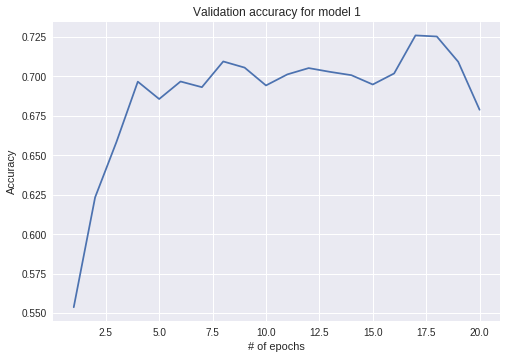

In [16]:
#plot results
import matplotlib as mpl
import matplotlib.pyplot as plt

epoch = []
for i in range(20):
  epoch.append(i+1)
  
plt.plot(epoch, history.history['val_acc'])
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.title("Validation accuracy for model 1")
plt.show()
  